# Final Project

### Setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv
import warnings

from sklearn import svm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline

%config InlineBackend.figure_format = 'retina'

### Model Description



Logistic Regression (LOGREG): we train both unregularized and regularized models, varying the ridge (regularization) parameter by factors of 10 from 10−8 to 104.

SVMs: we use the following kernels in SVMLight (Joachims, 1999): linear, polynomial degree 2 & 3, ra- dial with width {0.001,0.005,0.01,0.05,0.1,0.5,1,2}. We also vary the regularization parameter by factors of ten from 10^−7 to 10^3 with each kernel.

In [24]:
a = [1,2] + [3, 4]
a

[1, 2, 3, 4]

## COV Dataset

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

COV TYPE has been converted to a binary problem by treating the largest class as the positive and the rest as negative.

In [31]:
columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
           "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
           "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
           "Horizontal_Distance_To_Fire_Points"] + \
          ["Wilderness_Area_" + str(i) for i in range(4)] + \
          ["Soil_Type_" + str(i) for i in range(40)] + \
          ['Cover_Type']
cov_raw = pd.read_csv("covtype.data.gz", names = columns)

(581012, 55)

In [37]:
cov_raw['Cover_Type'] =  cov_raw['Cover_Type'].apply(
    lambda type_num: 1 if type_num == 7 else -1)
cov_raw.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,-1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,-1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,-1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,-1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,-1


## Letter Dataset

In [48]:
[chr(i) for i in range(ord("A"), ord("M") + 1)]

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

In [49]:
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy',
           'y-ege', 'yegvx']
letter_raw = pd.read_csv("data/letter-recognition.data", names = columns)

letter_p1 = letter_raw.assign(
    letter = letter_raw['letter'].apply(lambda letter: 1 if letter == 'O' else -1)
)

positive_class = [chr(i) for i in range(ord("A"), ord("M") + 1)]

letter_p2 = letter_raw.assign(
    letter = letter_raw['letter'].apply(lambda letter: 1 if letter in positive_class else -1)
)


,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,-1,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,-1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,1,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,1,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,-1,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,-1,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


## Adult data set
with data cleanning.

In [30]:
columns = ["age", "workclass", "fnlwgt","education","education-num","marital-status",
           "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week",
           "native-country",">50K"]
adult = pd.read_csv('adult.data', names = columns)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
adult['>50K'] = adult['>50K'].apply(lambda x: 1 if x.strip() != "<=50K" else -1)

In [32]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,-1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1


In [33]:
encoded = pd.get_dummies(adult, drop_first=True)
encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,>50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,>50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
encoded.drop(encoded.sample(50).index)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,>50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## CAPE dataset

In [34]:
cape = pd.read_csv("CAPE_all.csv")
cape = cape.assign(course_code = cape['Course'].apply(lambda course: str(course).split('-')[0][:-1]))
cape = cape.assign(department = cape["course_code"].apply(lambda code: str(code).split()[0]))
cape = cape.assign(course_num = cape["course_code"].apply(
    lambda code: str(code).split()[1] 
    if len(str(code).split()) == 2 else code))
cape = cape.assign(course_description = cape['Course'].apply(
    lambda course: str(course).split('-')[1] if len(str(course).split('-')) == 2 else course))
grade = cape[['department', 'course_num', 'Term', 'Study Hrs/wk', 'Avg Grade Expected', 'Avg Grade Received']][
    (cape["Avg Grade Expected"].notna()) & (cape["Avg Grade Received"].notna())
]
grade = grade.assign(
    GPA_Expected = grade['Avg Grade Expected'].apply(lambda grade: float(grade.split()[1][1:-1])),
    GPA_Received = grade['Avg Grade Received'].apply(lambda grade: float(grade.split()[1][1:-1])),
    letter_Recieved = grade['Avg Grade Received'].apply(lambda grade: grade.split()[0])
)

In [35]:
grade.shape

(35627, 9)

I gonna perform a binary classification task to predict the actual GPA recieve for the student in UCSD. Here, I am going to define the GPA_recieve that larger than 3.2 is a positive class and lower than 3.2 is a negative class

In [9]:
grade["GPA_Received"] = grade["GPA_Received"].apply(lambda grade: 1 if grade > 3.2 else -1)
grade = grade.drop(columns=['Avg Grade Expected', 'Avg Grade Received', 'letter_Recieved'])
grade.head()

,department,course_num,Term,Study Hrs/wk,GPA_Expected,GPA_Received
2,ANAR,146,FA20,4.00,3.81,1
3,ANBI,118,FA20,2.77,3.67,1
5,ANBI,136,FA20,5.17,3.27,-1
6,ANBI,141,FA20,3.75,3.70,1
9,ANSC,121,FA20,3.83,3.77,1


In [10]:
def clean_course_num(code):
    code = str(code)
    while code[-1].isalpha():
        code = code[:-1]
    code = int(code)
    if code >= 100:
        return 1
    return -1

In [11]:
grade['is_upper'] = grade['course_num'].apply(clean_course_num)
grade = grade.drop(columns=['course_num'])

In [12]:
grade_encoded = pd.get_dummies(grade,drop_first=True)
y_grade = grade_encoded['GPA_Received'].values
X_grade = grade_encoded.drop(columns=['GPA_Received']).to_numpy()
y_grade.shape, X_grade.shape

((35627,), (35627, 184))

## Logistical Regression on ADULT dataset

In [16]:
X = encoded.drop(columns = '>50K').to_numpy()
y = encoded['>50K'].values

In [17]:
def train_logi(X, y, C=0):
    """
    train a logistical regression clf using the provided data
    """
    if C == 0:
        clf = LogisticRegression(penalty='none', 
                                 max_iter = 5000, random_state = random_state)
    else:
        clf = LogisticRegression(C=C, max_iter = 5000,
                                random_state = random_state)
    clf.fit(X, y)
    return clf

In [18]:
def train_svm(X, y, C, kernel, degree, gamma):
    clf = svm.SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    clf.fit(X, y)
    return clf

### One Trail with calculated performance metric

In [19]:
def eval_model(model, X_test, y_test):
    """
    return the performance score of three different error metric
    the average between accurary, F1 score, and AUC
    """
    performance = np.array([model.score(X_test, y_test), 
                  roc_auc_score(y_test, model.decision_function(X_test)),
                  f1_score(y_test, model.predict(X_test))])
    return performance.mean()

### KFold Validation to get the perfromance

## SVM Initialize C, kernel, degree

In [32]:
gamma = [0.001,0.005,0.01,0.05,0.1,0.5,1,2]
kernel = ['linear', 'poly', 'rbf']
c_vals_svm = [float('10e' + str(num)) for num in range(-7, 4)] + [0]
poly_degree = [2, 3]

In [33]:
len(gamma) * len(kernel) * len(c_vals_svm) * 2

576

### Timeit for one trail
limit the amount of observation we train the svm on, 5000

In [20]:
performance = dict()
start = time.time()
performance[0] = K_fold_validation_SVM(X[:5000], y[:5000], 1, 'linear', 2, 0.1)
end = time.time()
print(end-start)
print("one trails for K=5 folds validation, SVM, adult dataset")

159.84368705749512
167.08157086372375
167.90595364570618
165.97931289672852
171.81422400474548
833.9982869625092
one trails for K=5 folds validation, SVM, adult dataset


In [21]:
performance

{0: 0.6370726448805415}

### Logistical Regression Initialize the C values

In [34]:
c_vals_logi = [float('10e' + str(num)) for num in range(-8, 5)] + [0]

In [35]:
performance = dict()
start = time.time()
performance[0] = K_fold_validation_logi(X, y, 0)
end = time.time()
print(end-start)
print("one trails for K=5 folds validation, adult dataset")

1.1162400245666504
one trails for K=5 folds validation, adult dataset


In [41]:
performance = dict()
start = time.time()
performance[0] = K_fold_validation_logi(X_grade, y_grade, 0)
end = time.time()
print(end-start)
print("one trails for K=5 folds validation, CAPE dataset")

24.25661301612854
one trails for K=5 folds validation, CAPE dataset


In [25]:
performance

{0: 0.7903193750464845}

### Grid Search for the C vals in Logi regression
`Approxi 42 min`

In [36]:
performance_logi_C = dict()
start = time.time()
for C in c_vals_logi:
    performance_logi_C[C] = K_fold_validation_logi(X, y, C)
end = time.time()
print(end-start)

15.867067098617554


In [43]:
with open('test.csv', 'w') as f:
    f.write(str(performance_logi_C))
    f.write("aha")

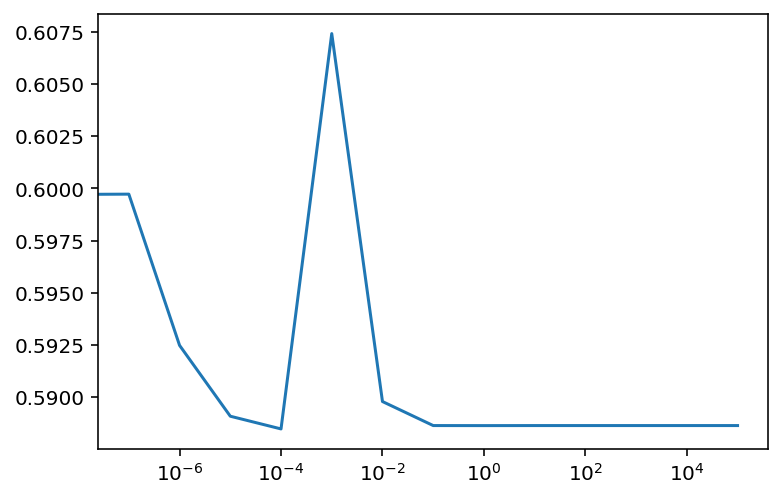

In [37]:
ax = sns.lineplot(data=performance_logi_C)
ax.set_xscale('log')

In [38]:
performance_logi_C = dict()
start = time.time()
for C in c_vals_logi:
    performance_logi_C[C] = K_fold_validation_logi(X_grade, y_grade, C)
end = time.time()
print(end-start)

133.36414504051208


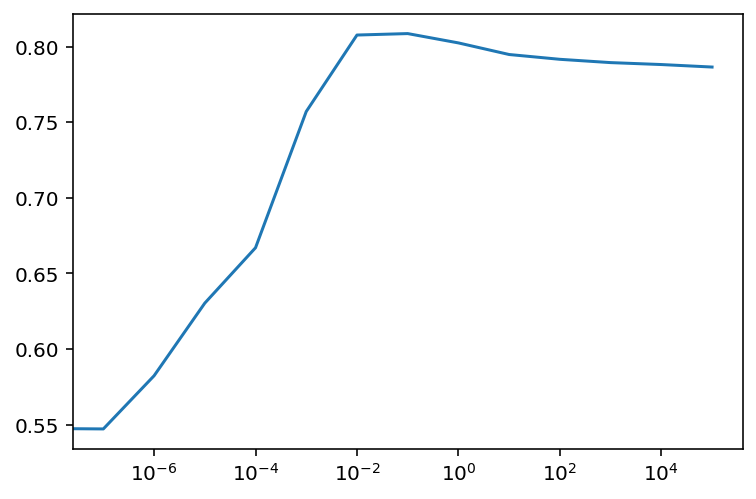

In [39]:
ax = sns.lineplot(data=performance_logi_C)
ax.set_xscale('log')

In [7]:
import joblib
warnings.filterwarnings('ignore')

In [8]:
models = joblib.load('best_model_params_adult.pkl')

In [9]:
models_df = joblib.load('adult_model.df')

In [10]:
models_df

,classifier__solver,roc_auc,classifier__C,classifier__n_neighbors,classifier__gamma,classifier__max_features,f1_score,acc,classifier,classifier__penalty,performance,classifier__weights
0,None,0.618597,0.1,NaN,NaN,NaN,0.334902,0.794928,"LogisticRegression(C=10.0, max_iter=5000, pena...",l1,0.582809,None
1,None,0.706185,1.0,NaN,NaN,NaN,0.398355,0.792968,"SVC(C=10.0, kernel='linear', probability=True)",None,0.632503,None
2,None,0.908442,NaN,NaN,NaN,16.0,0.676760,0.855920,"(DecisionTreeClassifier(max_features=16, preso...",None,0.813707,None
3,None,0.580277,NaN,31.0,NaN,NaN,0.144721,0.773992,"KNeighborsClassifier(n_jobs=-1, n_neighbors=46)",None,0.499663,distance
4,None,0.625114,0.1,NaN,NaN,NaN,0.335908,0.794129,"LogisticRegression(C=10.0, max_iter=5000, pena...",l1,0.585051,None
5,None,0.724514,10.0,NaN,NaN,NaN,0.396478,0.791118,"SVC(C=10.0, kernel='linear', probability=True)",None,0.637370,None
6,None,0.904239,NaN,NaN,NaN,20.0,0.662895,0.852981,"(DecisionTreeClassifier(max_features=16, preso...",None,0.806705,None
7,None,0.576651,NaN,41.0,NaN,NaN,0.112476,0.769239,"KNeighborsClassifier(n_jobs=-1, n_neighbors=46)",None,0.486122,distance
8,None,0.621984,0.1,NaN,NaN,NaN,0.338948,0.793513,"LogisticRegression(C=10.0, max_iter=5000, pena...",l1,0.584815,None
9,None,0.715117,1.0,NaN,NaN,NaN,0.396105,0.793005,"SVC(C=10.0, kernel='linear', probability=True)",None,0.634742,None
